# Motif Enrichment Analysis

## Make Backgrounds

In [22]:
# bash kernel

#input
Shared_Acc=$(read-ini ../config.ini CHRACC shared_peaks)

HH_cis_only=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_cis-only)
HH_trans_only=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_trans-only)
HH_cis_and_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_cis+trans)

MM_cis_only=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_cis-only)
MM_trans_only=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_trans-only)
MM_cis_and_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_cis+trans)

cis_only=$(read-ini ../config.ini CIS_TRANS cis-only)
trans_only=$(read-ini ../config.ini CIS_TRANS trans-only)
cis_and_trans=$(read-ini ../config.ini CIS_TRANS cis+trans)

cons_active=$(read-ini ../config.ini HH-VS-MM conserved_active)

HG38=/home/hansetj1/chrom.sizes/hg38.chrom.sizes

#output
bg_dir=$(read-ini ../config.ini HOMER bg_dir)

In [15]:
#make concatenated background
cat $cons_active $cis_only $trans_only $cis_and_trans > ${bg_dir}/all-background.bed

In [23]:
#make shuffled backgrounds for each file following sarah's method in the ms

for FILE in $HH_cis_only $HH_trans_only $HH_cis_and_trans $MM_cis_only $MM_trans_only $MM_cis_and_trans \
    $cis_only $trans_only $cis_and_trans $cons_active
do
    #remove file before making, if it exists
    rm -f ${bg_dir}/$(basename -s .bed $FILE).background.bed
    for i in {1..10}
    do
        bedtools shuffle -chrom -noOverlapping -maxTries 5000 -incl $Shared_Acc -i $FILE -g $HG38 >> \
            ${bg_dir}/$(basename -s .bed $FILE).shuffled-background.bed
    done
done

## Run HOMER findMotifGenome.pl

In [27]:
#output
res_HH_cis_only=$(read-ini ../config.ini HOMER hh-active_mm-inactive_cis-only)
res_HH_trans_only=$(read-ini ../config.ini HOMER hh-active_mm-inactive_trans-only)
res_HH_cis_and_trans=$(read-ini ../config.ini HOMER hh-active_mm-inactive_cis+trans)

res_MM_cis_only=$(read-ini ../config.ini HOMER mm-active_hh-inactive_cis-only)
res_MM_trans_only=$(read-ini ../config.ini HOMER mm-active_hh-inactive_trans-only)
res_MM_cis_and_trans=$(read-ini ../config.ini HOMER mm-active_hh-inactive_cis+trans)

res_cis_only=$(read-ini ../config.ini HOMER cis-only)
res_trans_only=$(read-ini ../config.ini HOMER trans-only)
res_cis_and_trans=$(read-ini ../config.ini HOMER cis+trans)

res_cons_active=$(read-ini ../config.ini HOMER conserved_active)

In [28]:
#HH
findMotifsGenome.pl $HH_cis_only hg38 $res_HH_cis_only -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $HH_cis_only).shuffled-background.bed

findMotifsGenome.pl $HH_trans_only hg38 $res_HH_trans_only -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $HH_trans_only).shuffled-background.bed

findMotifsGenome.pl $HH_cis_and_trans hg38 $res_HH_cis_and_trans -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $HH_cis_and_trans).shuffled-background.bed


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_cis-only.bed
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/hh-cis-only
	Using 4 CPUs
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Will not run homer for de novo motifs
	background position file: /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/backgrounds/HH-active_MM-inactive_cis-only.shuffled-background.bed
	Peak/BED file conversion summary:
		BED/Header formatted lines: 1114
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 1114
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Peak/BED file conversion summary:
		BED/Header f

		48 of 428 (1e-2) HIC1(Zf)/Treg-ZBTB29-ChIP-Seq(GSE99889)/Homer
	Skipping...
	Job finished - if results look good, please send beer to ..

	Cleaning up tmp files...


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_trans-only.bed
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/hh-trans-only
	Using 4 CPUs
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Will not run homer for de novo motifs
	background position file: /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/backgrounds/HH-active_MM-inactive_trans-only.shuffled-background.bed
	Peak/BED file conversion summary:
		BED/Header formatted lines: 812
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 812
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coor

		43 of 428 (1e-3) Fli1(ETS)/CD8-FLI-ChIP-Seq(GSE20898)/Homer
		44 of 428 (1e-3) EWS:FLI1-fusion(ETS)/SK_N_MC-EWS:FLI1-ChIP-Seq(SRA014231)/Homer
		45 of 428 (1e-3) Atf2(bZIP)/3T3L1-Atf2-ChIP-Seq(GSE56872)/Homer
		46 of 428 (1e-3) EWS:ERG-fusion(ETS)/CADO_ES1-EWS:ERG-ChIP-Seq(SRA014231)/Homer
		47 of 428 (1e-2) ELF5(ETS)/T47D-ELF5-ChIP-Seq(GSE30407)/Homer
		48 of 428 (1e-2) GATA3(Zf),DR4/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer
		49 of 428 (1e-2) Dlx3(Homeobox)/Kerainocytes-Dlx3-ChIP-Seq(GSE89884)/Homer
		50 of 428 (1e-2) ETV1(ETS)/GIST48-ETV1-ChIP-Seq(GSE22441)/Homer
		51 of 428 (1e-2) E2F4(E2F)/K562-E2F4-ChIP-Seq(GSE31477)/Homer
		52 of 428 (1e-2) Atf7(bZIP)/3T3L1-Atf7-ChIP-Seq(GSE56872)/Homer
		53 of 428 (1e-2) AP-2alpha(AP2)/Hela-AP2alpha-ChIP-Seq(GSE31477)/Homer
		54 of 428 (1e-2) Nrf2(bZIP)/Lymphoblast-Nrf2-ChIP-Seq(GSE37589)/Homer
		55 of 428 (1e-2) MafK(bZIP)/C2C12-MafK-ChIP-Seq(GSE36030)/Homer
		56 of 428 (1e-2) Sp2(Zf)/HEK293-Sp2.eGFP-ChIP-Seq(Encode)/Homer
		57 of 428 (1e-2) T1IS

		21 of 428 (1e-2) BHLHA15(bHLH)/NIH3T3-BHLHB8.HA-ChIP-Seq(GSE119782)/Homer
		22 of 428 (1e-2) EBF2(EBF)/BrownAdipose-EBF2-ChIP-Seq(GSE97114)/Homer
		23 of 428 (1e-2) NRF(NRF)/Promoter/Homer
		24 of 428 (1e-2) Tcf3(HMG)/mES-Tcf3-ChIP-Seq(GSE11724)/Homer
		25 of 428 (1e-2) AP-1(bZIP)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer
		26 of 428 (1e-2) ZBTB33(Zf)/GM12878-ZBTB33-ChIP-Seq(GSE32465)/Homer
		27 of 428 (1e-2) RXR(NR),DR1/3T3L1-RXR-ChIP-Seq(GSE13511)/Homer
		28 of 428 (1e-2) E-box(bHLH)/Promoter/Homer
		29 of 428 (1e-2) CRE(bZIP)/Promoter/Homer
		30 of 428 (1e-2) NFkB-p50,p52(RHD)/Monocyte-p50-ChIP-Chip(Schreiber_et_al.)/Homer
		31 of 428 (1e-2) Olig2(bHLH)/Neuron-Olig2-ChIP-Seq(GSE30882)/Homer
		32 of 428 (1e-2) Atf3(bZIP)/GBM-ATF3-ChIP-Seq(GSE33912)/Homer
		33 of 428 (1e-2) ZFX(Zf)/mES-Zfx-ChIP-Seq(GSE11431)/Homer
		34 of 428 (1e-2) Ascl2(bHLH)/ESC-Ascl2-ChIP-Seq(GSE97712)/Homer
	Skipping...
	Job finished - if results look good, please send beer to ..

	Cleaning up tmp files...



In [29]:
#MM
findMotifsGenome.pl $MM_cis_only hg38 $res_MM_cis_only -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $MM_cis_only).shuffled-background.bed

findMotifsGenome.pl $MM_trans_only hg38 $res_MM_trans_only -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $MM_trans_only).shuffled-background.bed

findMotifsGenome.pl $MM_cis_and_trans hg38 $res_MM_cis_and_trans -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $MM_cis_and_trans).shuffled-background.bed


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_cis-only.bed
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/mm-cis-only
	Using 4 CPUs
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Will not run homer for de novo motifs
	background position file: /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/backgrounds/MM-active_HH-inactive_cis-only.shuffled-background.bed
	Peak/BED file conversion summary:
		BED/Header formatted lines: 1040
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 1040
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Peak/BED file conversion summary:
		BED/Header f

		48 of 428 (1e-2) Nrf2(bZIP)/Lymphoblast-Nrf2-ChIP-Seq(GSE37589)/Homer
	Skipping...
	Job finished - if results look good, please send beer to ..

	Cleaning up tmp files...


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_trans-only.bed
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/mm-trans-only
	Using 4 CPUs
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Will not run homer for de novo motifs
	background position file: /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/backgrounds/MM-active_HH-inactive_trans-only.shuffled-background.bed
	Peak/BED file conversion summary:
		BED/Header formatted lines: 1171
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 1171
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misforma

		45 of 428 (1e-2) Zac1(Zf)/Neuro2A-Plagl1-ChIP-Seq(GSE75942)/Homer
		46 of 428 (1e-2) NFE2L2(bZIP)/HepG2-NFE2L2-ChIP-Seq(Encode)/Homer
	Skipping...
	Job finished - if results look good, please send beer to ..

	Cleaning up tmp files...


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_cis+trans.bed
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/mm-cis+trans
	Using 4 CPUs
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Will not run homer for de novo motifs
	background position file: /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/backgrounds/MM-active_HH-inactive_cis+trans.shuffled-background.bed
	Peak/BED file conversion summary:
		BED/Header formatted lines: 3994
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 3994
		Redundant Peak IDs: 0
		Peaks lacking informatio

In [30]:
#together
findMotifsGenome.pl $cis_only hg38 $res_cis_only -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $cis_only).shuffled-background.bed

findMotifsGenome.pl $trans_only hg38 $res_trans_only -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $trans_only).shuffled-background.bedd

findMotifsGenome.pl $cis_and_trans hg38 $res_cis_and_trans -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $cis_and_trans).shuffled-background.bed

findMotifsGenome.pl $cons_active hg38 $res_cons_active -p 4 -mset vertebrates -size given -nomotif \
        -bg ${bg_dir}/$(basename -s .bed $cons_active).shuffled-background.bed


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/cis-only.bed
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/cis-only
	Using 4 CPUs
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Will not run homer for de novo motifs
	background position file: /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/backgrounds/cis-only.shuffled-background.bed
	Peak/BED file conversion summary:
		BED/Header formatted lines: 2154
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 2154
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Peak/BED file conversion summary:
		BED/Header formatted lines: 21540
		peakfile formatted line

		47 of 428 (1e-2) TFE3(bHLH)/MEF-TFE3-ChIP-Seq(GSE75757)/Homer
		48 of 428 (1e-2) Chop(bZIP)/MEF-Chop-ChIP-Seq(GSE35681)/Homer
		49 of 428 (1e-2) Atf4(bZIP)/MEF-Atf4-ChIP-Seq(GSE35681)/Homer
		50 of 428 (1e-2) NF1-halfsite(CTF)/LNCaP-NF1-ChIP-Seq(Unpublished)/Homer
		51 of 428 (1e-2) CEBP:AP1(bZIP)/ThioMac-CEBPb-ChIP-Seq(GSE21512)/Homer
		52 of 428 (1e-2) IRF:BATF(IRF:bZIP)/pDC-Irf8-ChIP-Seq(GSE66899)/Homer
		53 of 428 (1e-2) T1ISRE(IRF)/ThioMac-Ifnb-Expression/Homer
		54 of 428 (1e-2) Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer
		55 of 428 (1e-2) Tcf3(HMG)/mES-Tcf3-ChIP-Seq(GSE11724)/Homer
		56 of 428 (1e-2) CRE(bZIP)/Promoter/Homer
		57 of 428 (1e-2) GFX(?)/Promoter/Homer
		58 of 428 (1e-2) bZIP:IRF(bZIP,IRF)/Th17-BatF-ChIP-Seq(GSE39756)/Homer
		59 of 428 (1e-2) ETS:RUNX(ETS,Runt)/Jurkat-RUNX1-ChIP-Seq(GSE17954)/Homer
		60 of 428 (1e-2) Jun-AP1(bZIP)/K562-cJun-ChIP-Seq(GSE31477)/Homer
		61 of 428 (1e-2) ZNF416(Zf)/HEK293-ZNF416.GFP-ChIP-Seq(GSE58341)/Homer
		62 of 428 (1e-2) Me


	Extracting sequences from file: /data/hodges_lab/bin/HOMERv4.10_5-16-2018/.//data/genomes/hg38///genome.fa
	Looking for peak sequences in a single file (/data/hodges_lab/bin/HOMERv4.10_5-16-2018/.//data/genomes/hg38///genome.fa)
	Extracting 9338 sequences from chr1
	Extracting 4015 sequences from chr10
	Extracting 4939 sequences from chr11
	Extracting 4673 sequences from chr12
	Extracting 1709 sequences from chr13
	Extracting 2934 sequences from chr14
	Extracting 2978 sequences from chr15
	Extracting 3830 sequences from chr16
	Extracting 5113 sequences from chr17
	Extracting 1386 sequences from chr18
	Extracting 5516 sequences from chr19
	Extracting 6314 sequences from chr2
	Extracting 2462 sequences from chr20
	Extracting 973 sequences from chr21
	Extracting 2156 sequences from chr22
	Extracting 5104 sequences from chr3
	Extracting 3223 sequences from chr4
	Extracting 4504 sequences from chr5
	Extracting 4676 sequences from chr6
	Extracting 4455 sequences from chr7
	Extracting 3462 

		31691 total

	Frequency Bins: 0.2 0.25 0.3 0.35 0.4 0.45 0.5 0.6 0.7 0.8
	Freq	Bin	Count
	0.2	0	5
	0.25	1	10
	0.3	2	92
	0.35	3	551
	0.4	4	1645
	0.45	5	3154
	0.5	6	4076
	0.6	7	9395
	0.7	8	7621
	0.8	9	4422
	10	10	720
	Bin	# Targets	# Background	Background Weight
	3	3	548	0.050
	4	51	1594	0.293
	5	151	3003	0.461
	6	371	3705	0.919
	7	1336	8059	1.521
	8	1060	6561	1.482
	9	62	4360	0.130
	Normalizing lower order oligos using homer2

	Reading input files...
	30864 total sequences read
	Autonormalization: 1-mers (4 total)
		A	21.65%	21.61%	1.002
		C	28.35%	28.39%	0.999
		G	28.35%	28.39%	0.999
		T	21.65%	21.61%	1.002
	Autonormalization: 2-mers (16 total)
		AA	5.60%	5.51%	1.017
		CA	6.73%	6.99%	0.962
		GA	6.48%	6.21%	1.043
		TA	2.84%	2.89%	0.983
		AC	4.89%	4.91%	0.995
		CC	8.99%	9.50%	0.946
		GC	7.99%	7.76%	1.029
		TC	6.48%	6.21%	1.043
		AG	7.68%	7.71%	0.996
		CG	4.95%	4.19%	1.182
		GG	8.99%	9.50%	0.946
		TG	6.73%	6.99%	0.962
		AT	3.48%	3.48%	1.001
		CT	7.68%	7.71%	0.996
		GT	4.89%	4.91%	0.995


		90 of 428 (1e-2) PRDM10(Zf)/HEK293-PRDM10.eGFP-ChIP-Seq(Encode)/Homer
		91 of 428 (1e-2) ZNF416(Zf)/HEK293-ZNF416.GFP-ChIP-Seq(GSE58341)/Homer
		92 of 428 (1e-2) PRDM9(Zf)/Testis-DMC1-ChIP-Seq(GSE35498)/Homer
		93 of 428 (1e-2) IRF4(IRF)/GM12878-IRF4-ChIP-Seq(GSE32465)/Homer
		94 of 428 (1e-2) RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer
		95 of 428 (1e-2) SCL(bHLH)/HPC7-Scl-ChIP-Seq(GSE13511)/Homer
		96 of 428 (1e-2) E2F4(E2F)/K562-E2F4-ChIP-Seq(GSE31477)/Homer
		97 of 428 (1e-2) CEBP:AP1(bZIP)/ThioMac-CEBPb-ChIP-Seq(GSE21512)/Homer
		98 of 428 (1e-2) E-box(bHLH)/Promoter/Homer
		99 of 428 (1e-2) STAT6(Stat)/Macrophage-Stat6-ChIP-Seq(GSE38377)/Homer
		100 of 428 (1e-2) Zic(Zf)/Cerebellum-ZIC1.2-ChIP-Seq(GSE60731)/Homer
		101 of 428 (1e-2) Rfx6(HTH)/Min6b1-Rfx6.HA-ChIP-Seq(GSE62844)/Homer
		102 of 428 (1e-2) Hoxc9(Homeobox)/Ainv15-Hoxc9-ChIP-Seq(GSE21812)/Homer
		103 of 428 (1e-2) IRF:BATF(IRF:bZIP)/pDC-Irf8-ChIP-Seq(GSE66899)/Homer
		104 of 428 (1e-2) NFE2L2(bZIP)/HepG2-NFE2L2-ChI

## Plot HOMER results 

Make a heatmap of the results. X = Motif and Y = region set and color = pvalue. Top 20 motifs from each are collected to make the representative group for plotting. All results are plotted in supplement maybe?

### All region sets

In [1]:
# r kernel

library(tidyverse)
library(ggrepel)

#Read in motif results txt files using for loop - do human context first
dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HOMER/'

for (i in list("hh-cis-only","hh-trans-only","hh-cis+trans","mm-cis-only","mm-trans-only","mm-cis+trans",
    "cis-only","trans-only","cis+trans","cons_active")) {
    tsv <- read_tsv(paste0(dir,i,"/knownResults.txt"), 
                       col_names=c("MotifName","Consensus","p","logp","q","numTarget", 
                               "percentTarget","numBackground","percentBackground"), 
                       skip = 1, show_col_types = FALSE) %>% 
        mutate(type = as.character(i))
    assign(value = tsv, x = paste0(i))
}

# function to format results
format_motif_results <- function(df, n = 10) {
    df <- dplyr::transmute(df, Motif = MotifName, logp, type, top_motif = ifelse(rank(logp) <= n, TRUE, FALSE))
    return(df)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [70]:
# apply function to each condition using by combining into list and applying
# function to all elements with map.
results_list <- list(hh_cis=`hh-cis-only`,hh_trans=`hh-trans-only`,hh_ct=`hh-cis+trans`,
    mm_cis=`mm-cis-only`,mm_trans=`mm-trans-only`,mm_ct=`mm-cis+trans`,
    cis=`cis-only`,trans=`trans-only`,ct=`cis+trans`)

formatted_list <- map(results_list, format_motif_results, n = 15)

In [71]:
#Filter by top_motif, then merge dataframes together
filtered_df <- reduce(formatted_list, bind_rows) %>% dplyr::filter(top_motif == TRUE)

In [72]:
#add back values from each df. 
for (i in formatted_list) {
    filtered_df <- left_join(filtered_df, i, by = "Motif")
}

In [74]:
#hand convert join to cleaned df
top_motifs_clean <- transmute(filtered_df, Motif, hh_cis_only = logp.y, hh_trans_only = logp.x.x,
                                          hh_cis_and_trans = logp.y.y, mm_cis_only = logp.x.x.x, 
                                          mm_trans_only = logp.y.y.y, mm_cis_and_trans = logp.x.x.x.x, 
                                          cis_only = logp.y.y.y.y, trans_only = logp.x.x.x.x.x, 
                                          cis_and_trans = logp.y.y.y.y.y)

In [75]:
all_mat <- unique(top_motifs_clean) %>% column_to_rownames(var = "Motif") %>%
    select(cis_only, hh_cis_only, mm_cis_only,
           trans_only, hh_trans_only, mm_trans_only, 
           cis_and_trans, hh_cis_and_trans, mm_cis_and_trans) %>% as.matrix() * -1

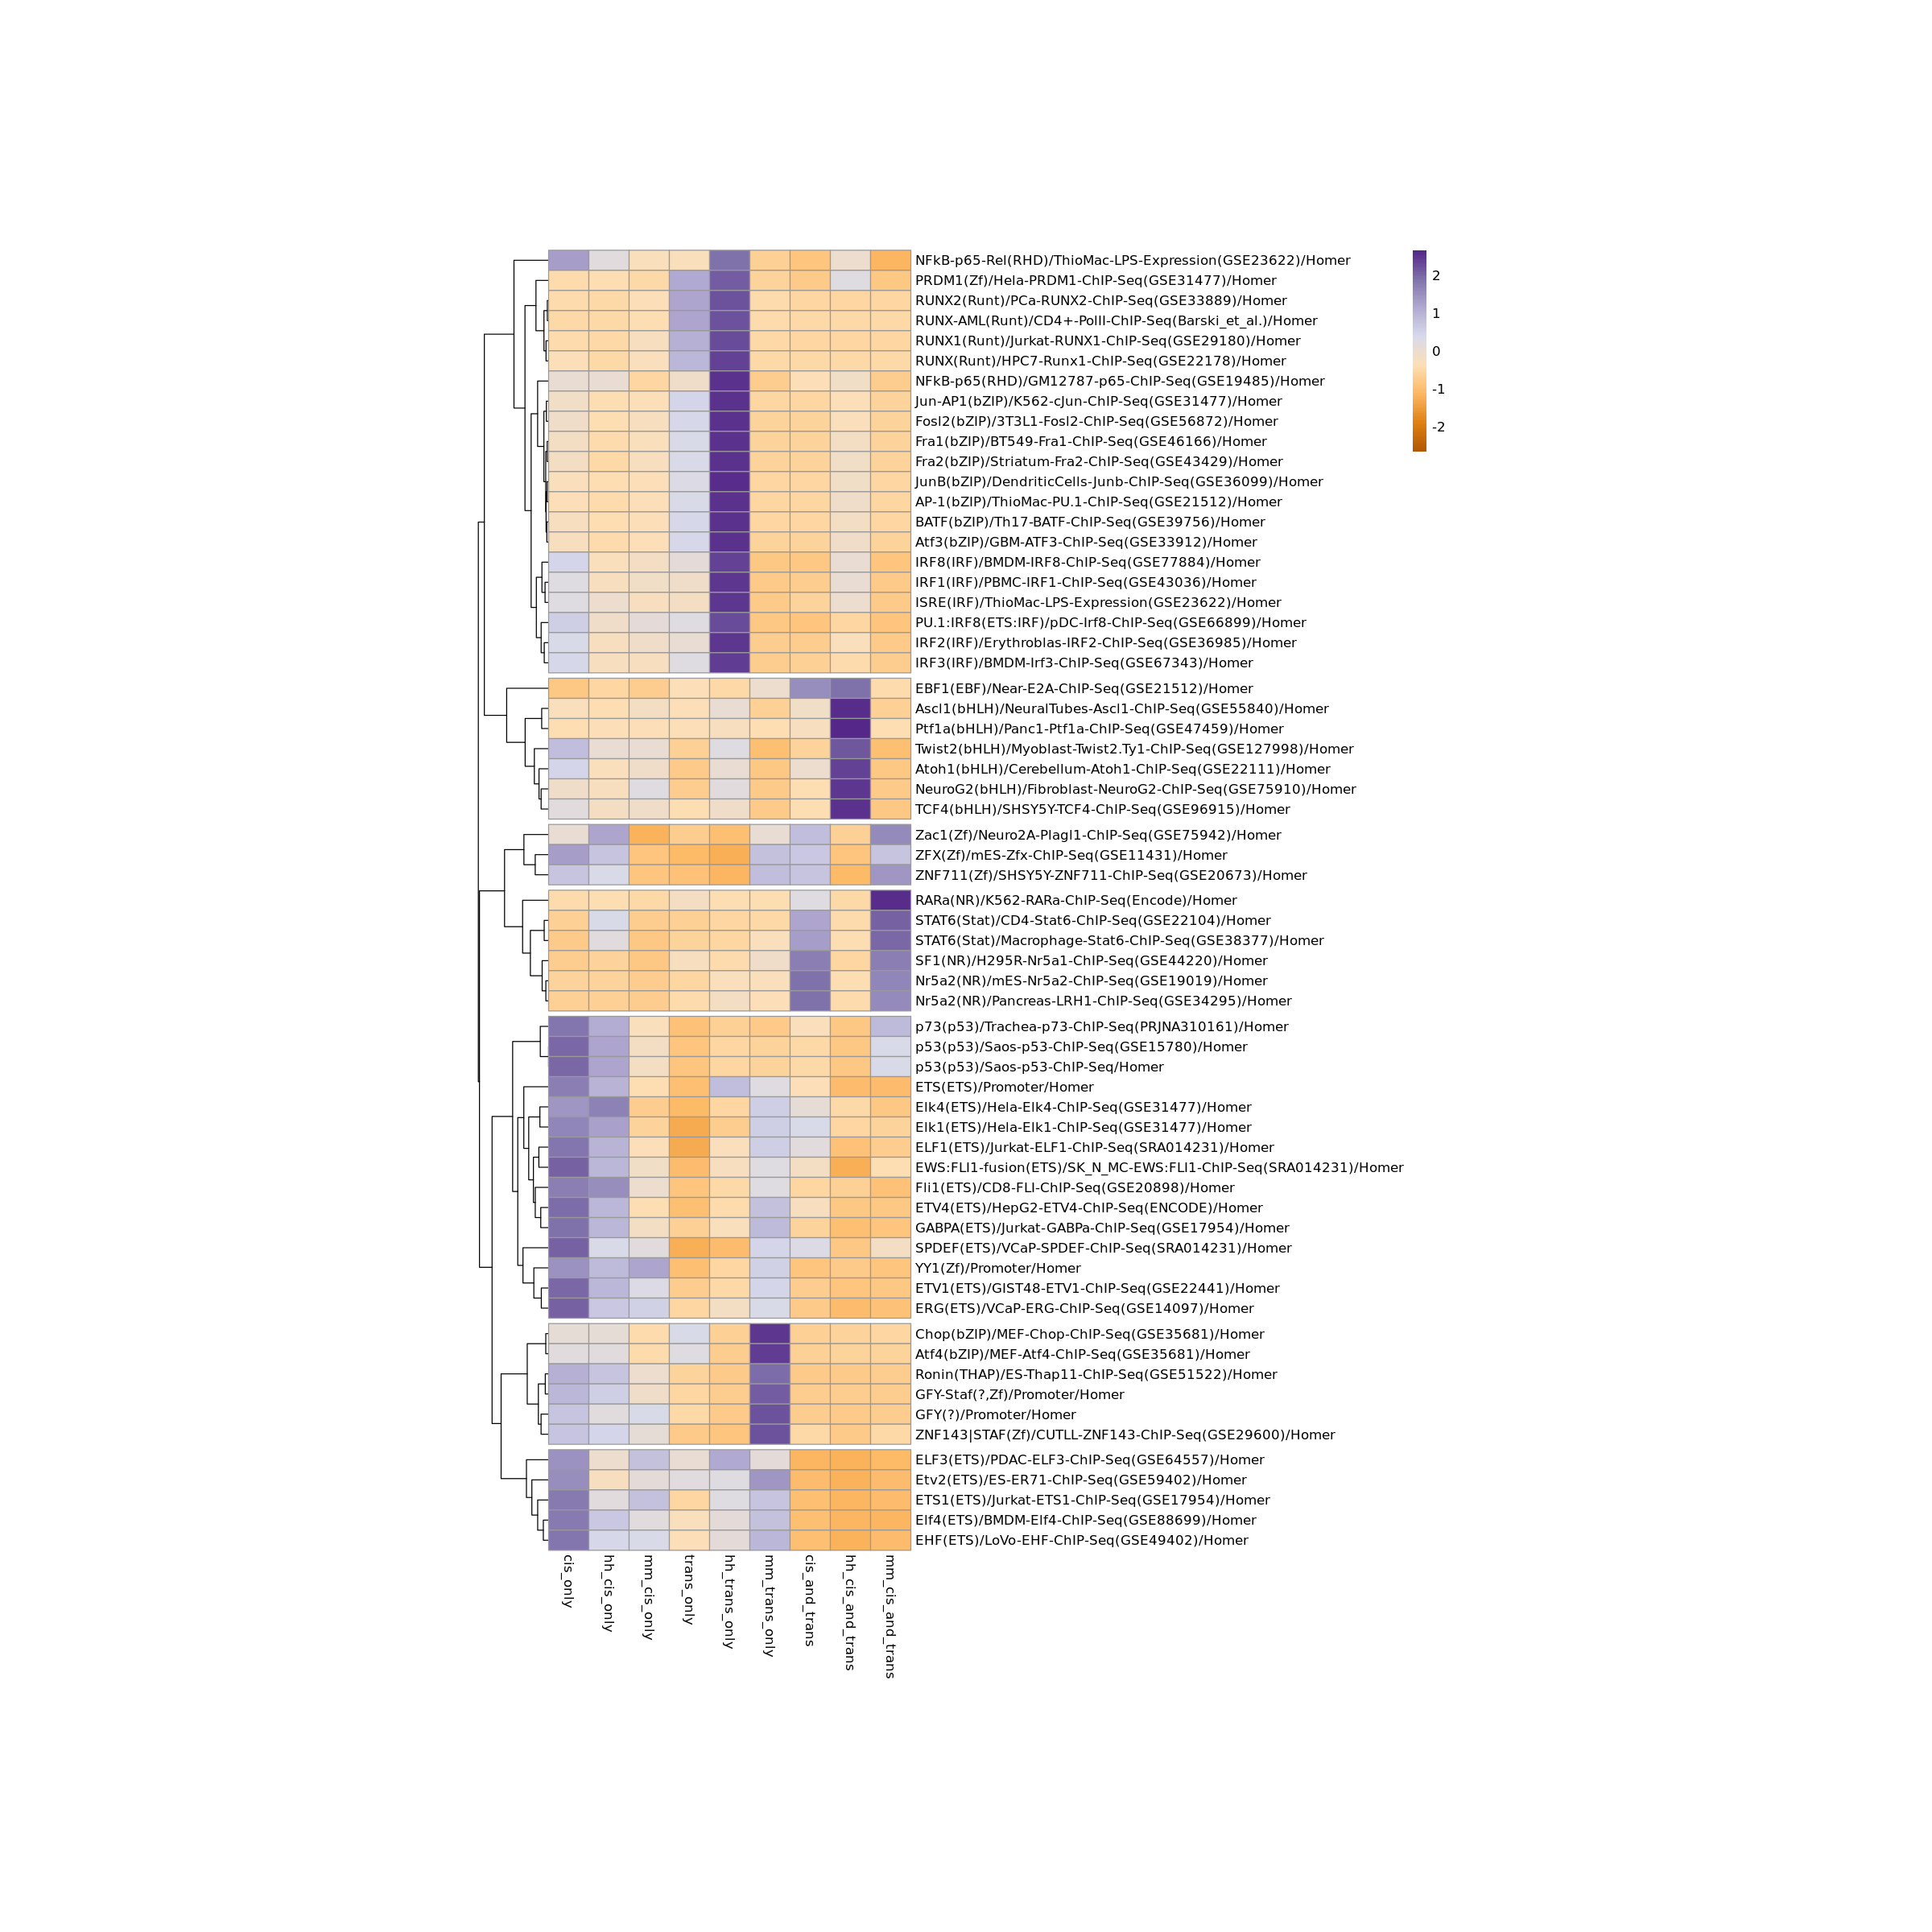

In [77]:
options(repr.plot.width = 20, repr.plot.height = 20)


colMain <- colorRampPalette((RColorBrewer::brewer.pal(8, "PuOr")))(100)
p <- pheatmap::pheatmap(all_mat, scale="row", col=colMain, 
                   cluster_cols = FALSE, cluster_rows = TRUE, 
                   cutree_rows = 7, cellheight = 15, cellwidth = 30, method = "ward.D2")

ini <- ini::read.ini("../config.ini")

ggsave(p, filename = paste0(ini$HOMER$plots, "/combinded_heatmap_all_top15.pdf"), units = c("in"), 
      height = 20, width = 20, , device = cairo_pdf)

### species specific region sets

In [12]:
# apply function to each condition using by combining into list and applying
# function to all elements with map.
results_list <- list(hh_cis=`hh-cis-only`,hh_trans=`hh-trans-only`,hh_ct=`hh-cis+trans`,
    mm_cis=`mm-cis-only`,mm_trans=`mm-trans-only`,mm_ct=`mm-cis+trans`)

formatted_list <- map(results_list, format_motif_results, n = 10)

In [13]:
#Filter by top_motif, then merge dataframes together
filtered_df <- reduce(formatted_list, bind_rows) %>% dplyr::filter(top_motif == TRUE)

In [14]:
#add back values from each df. 
for (i in formatted_list) {
    filtered_df <- left_join(filtered_df, i, by = "Motif")
}

In [15]:
#hand convert join to cleaned df
top_motifs_clean <- transmute(filtered_df, Motif, hh_cis_only = logp.y, hh_trans_only = logp.x.x,
                                          hh_cis_and_trans = logp.y.y, mm_cis_only = logp.x.x.x, 
                                          mm_trans_only = logp.y.y.y, mm_cis_and_trans = logp)

In [16]:
all_mat <- unique(top_motifs_clean) %>% column_to_rownames(var = "Motif") %>%
    select(hh_cis_only, mm_cis_only,
           hh_trans_only, mm_trans_only, 
           hh_cis_and_trans, mm_cis_and_trans) %>% as.matrix() * -1

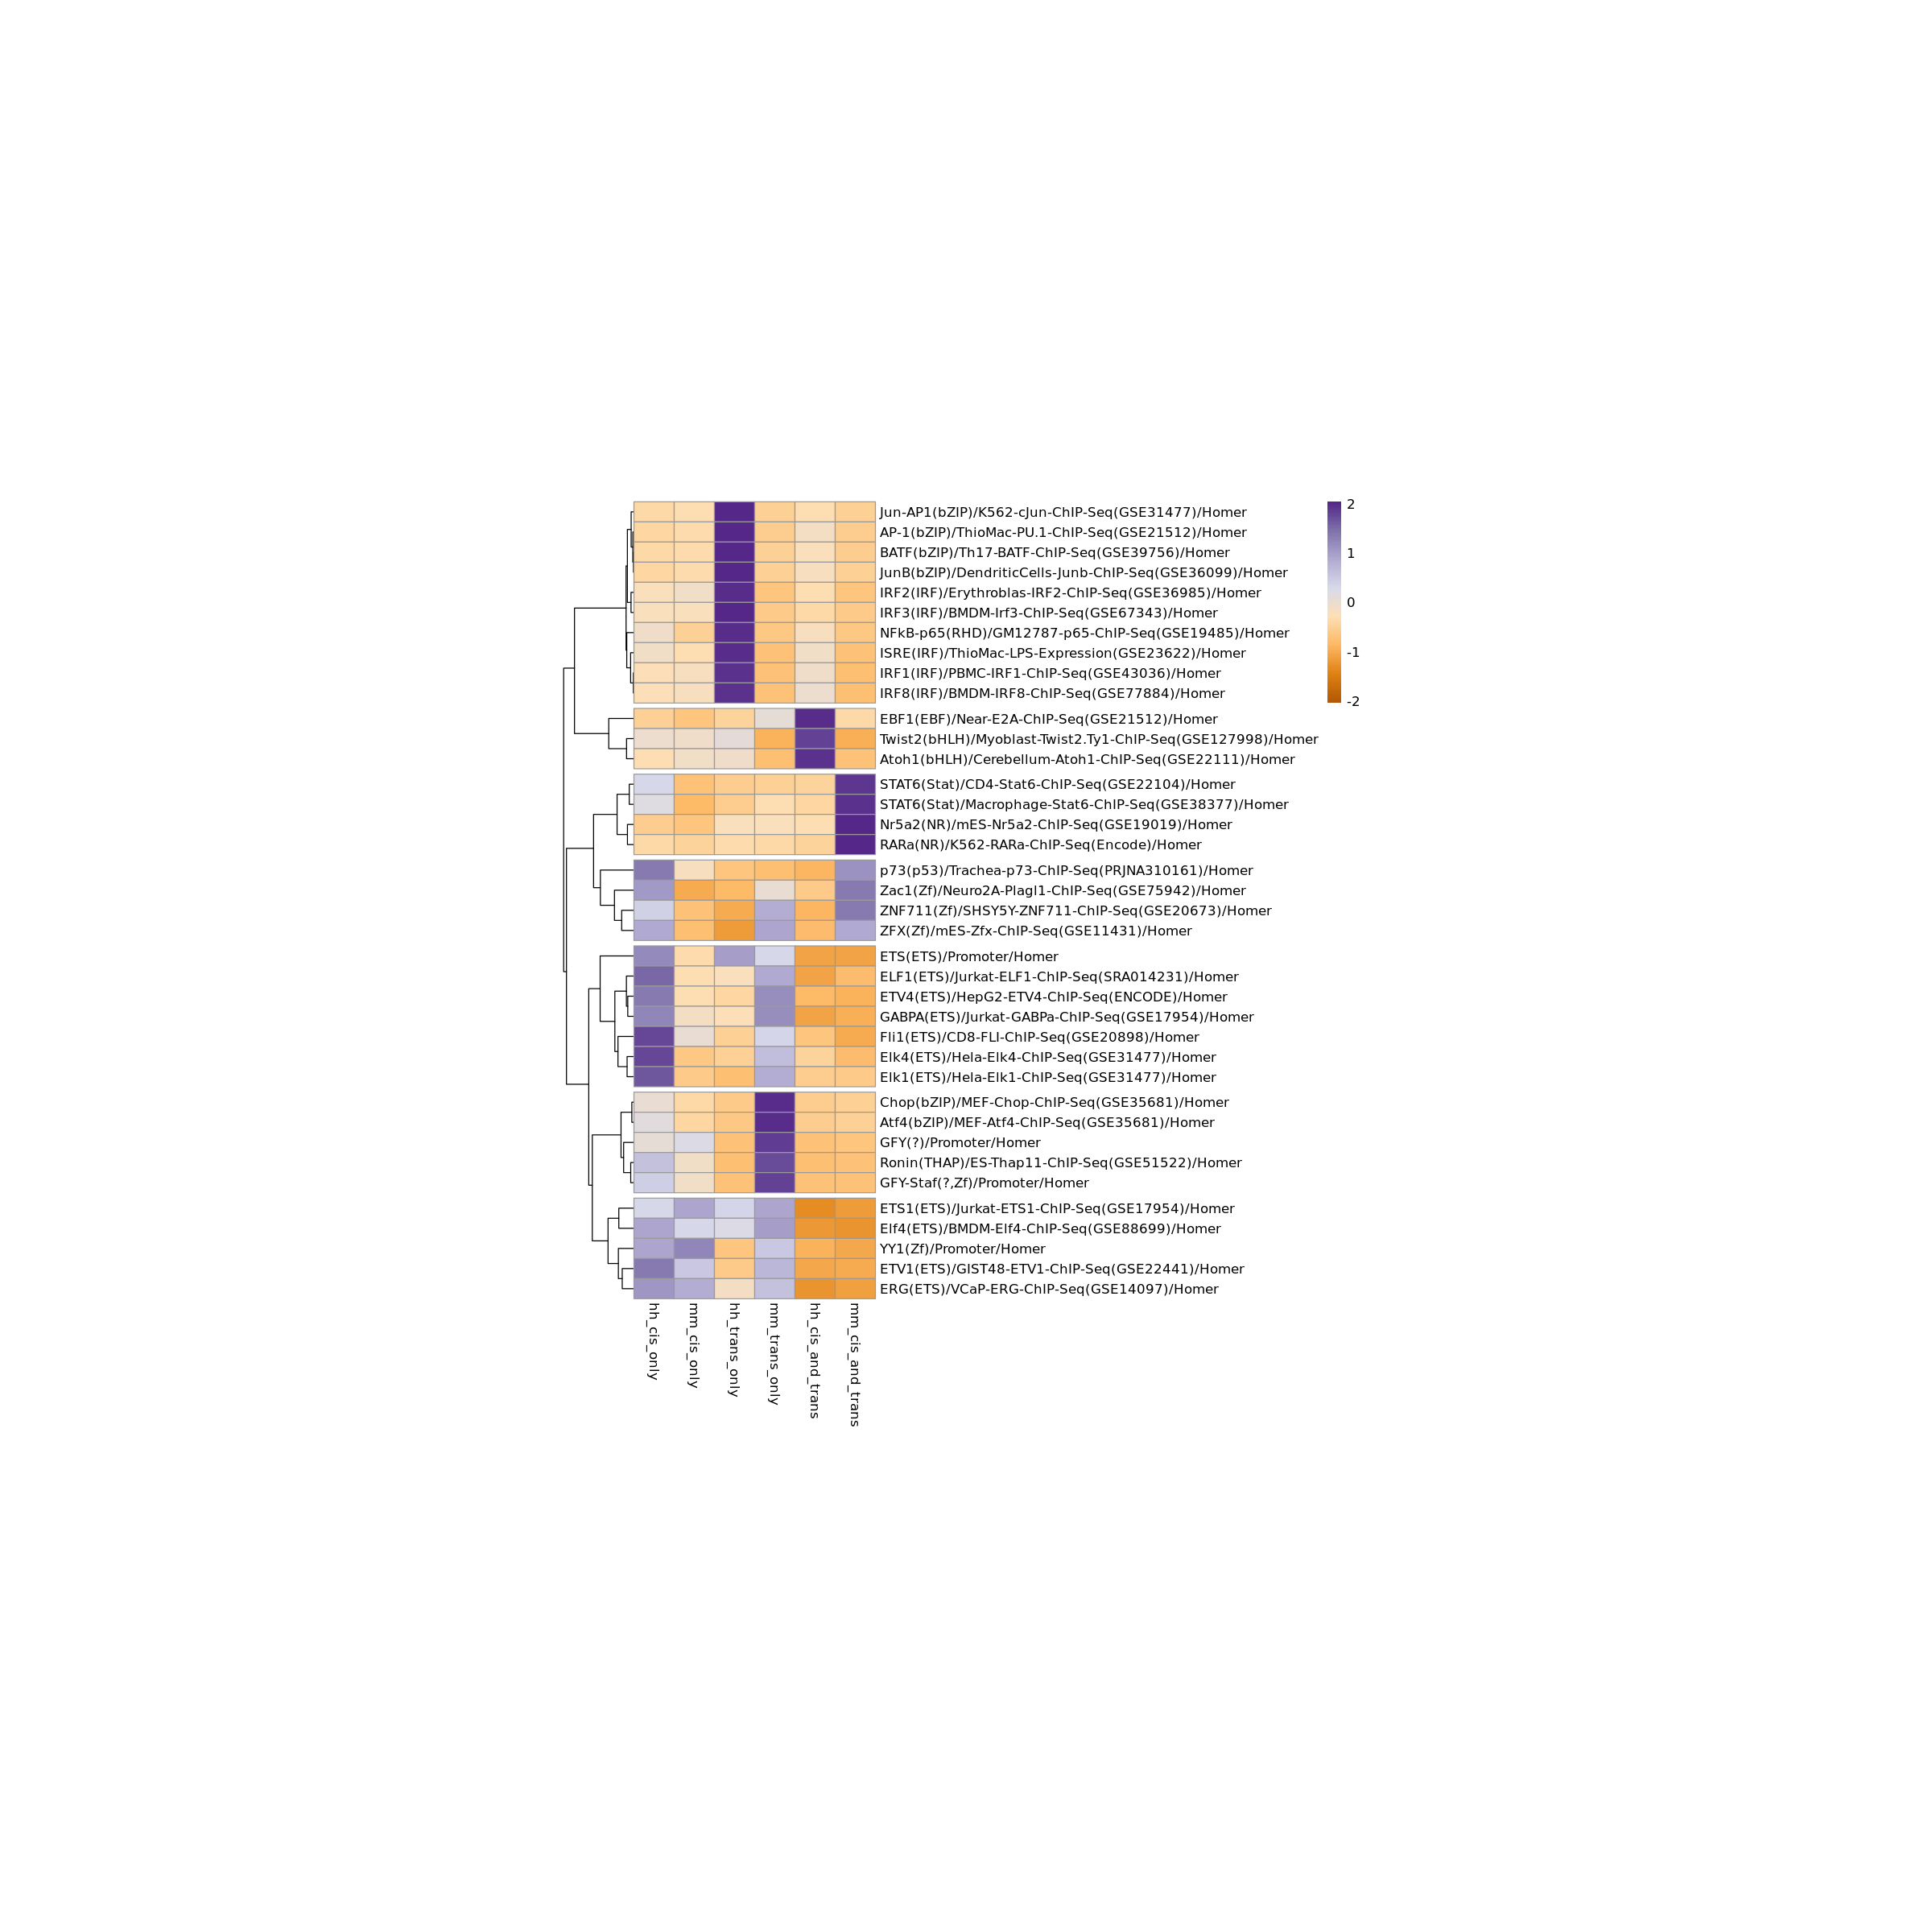

In [17]:
options(repr.plot.width = 20, repr.plot.height = 20)


colMain <- colorRampPalette((RColorBrewer::brewer.pal(8, "PuOr")))(100)
p <- pheatmap::pheatmap(all_mat, scale="row", col=colMain, 
                   cluster_cols = FALSE, cluster_rows = TRUE, 
                   cutree_rows = 7, cellheight = 15, cellwidth = 30, method = "ward.D2")

ini <- ini::read.ini("../config.ini")

ggsave(p, filename = paste0(ini$HOMER$plots, "/combinded_heatmap_species-specific_top10.pdf"), units = c("in"), 
      height = 20, width = 20, , device = cairo_pdf)